Test notebook to demonstrate how to open individual files and plot variables without using Coffea. Useful for simple studies.

In [1]:
import uproot
import vector
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [2]:
#Fill in the path to individual llpNanoAOD files here
#file_path = "SIDM/Student_Notebooks/"
#file_names  = ["ffNtuple_2Mu2E_500_1p2_9p6.root","ffNtuple_2Mu2E_200_1p2_4p8.root","ffNtuple_2Mu2E_500_5_40.root"]
file_path = "root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-1000_MDp-0p25_ctau-0p002_v3/LLPnanoAODv2/"
file_names = [
    "CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-1000_MDp-0p25_ctau-0p002_v3_part-0.root",
]


branches_dict = {}

for file_name in file_names:
    print("Opening ",file_path+file_name)
    temp_file = uproot.open(file_path+file_name)
    tree = temp_file['Events']
    #Load all the branches into memory and store in branches_dict (this is slow, and could be done in a 
    #"lazy" way to only read the arrays that we end up using, but I'm too lazy to be lazy)
    branches_dict[file_name] = tree.arrays()

Opening  root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-1000_MDp-0p25_ctau-0p002_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-1000_MDp-0p25_ctau-0p002_v3_part-0.root


In [3]:
#Explore the branches in the files
tree.keys(filter_name="Muon_*")

['Muon_dxy',
 'Muon_dxyErr',
 'Muon_dxybs',
 'Muon_dz',
 'Muon_dzErr',
 'Muon_eta',
 'Muon_ip3d',
 'Muon_jetPtRelv2',
 'Muon_jetRelIso',
 'Muon_mass',
 'Muon_miniPFRelIso_all',
 'Muon_miniPFRelIso_chg',
 'Muon_pfRelIso03_all',
 'Muon_pfRelIso03_chg',
 'Muon_pfRelIso04_all',
 'Muon_phi',
 'Muon_pt',
 'Muon_ptErr',
 'Muon_segmentComp',
 'Muon_sip3d',
 'Muon_softMva',
 'Muon_tkRelIso',
 'Muon_tunepRelPt',
 'Muon_mvaLowPt',
 'Muon_mvaTTH',
 'Muon_charge',
 'Muon_jetIdx',
 'Muon_nStations',
 'Muon_nTrackerLayers',
 'Muon_pdgId',
 'Muon_tightCharge',
 'Muon_fsrPhotonIdx',
 'Muon_highPtId',
 'Muon_highPurity',
 'Muon_inTimeMuon',
 'Muon_isGlobal',
 'Muon_isPFcand',
 'Muon_isStandalone',
 'Muon_isTracker',
 'Muon_jetNDauCharged',
 'Muon_looseId',
 'Muon_mediumId',
 'Muon_mediumPromptId',
 'Muon_miniIsoId',
 'Muon_multiIsoId',
 'Muon_mvaId',
 'Muon_mvaLowPtId',
 'Muon_pfIsoId',
 'Muon_puppiIsoId',
 'Muon_softId',
 'Muon_softMvaId',
 'Muon_tightId',
 'Muon_tkIsoId',
 'Muon_triggerIdLoose',
 'Muo

Processing  CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-1000_MDp-0p25_ctau-0p002_v3_part-0.root


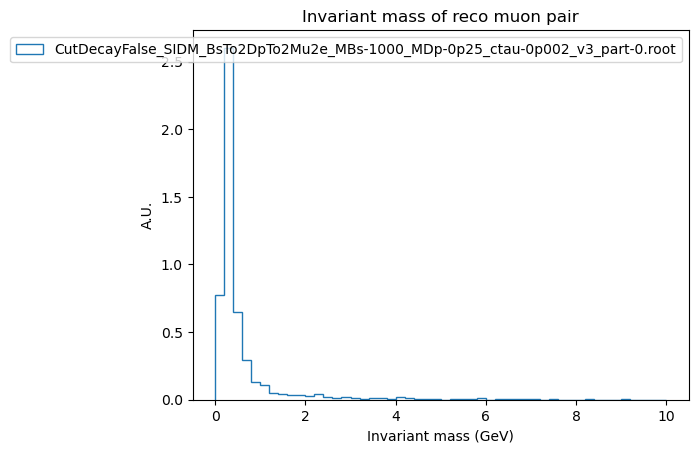

In [4]:
#Plot the invariant mass of the reconstructed muon pair (should peak at the dark photon mass)

for file_name in file_names:
    print("Processing ",file_name)
    branches = branches_dict[file_name]
    
    #Create a vector object for the muons
    muon_p4 = vector.zip({"pt": branches['Muon_pt'],
                          "eta": branches['Muon_eta'],
                          "phi": branches['Muon_phi'],
                          "mass": branches['Muon_mass']})
    
    #Apply quality cuts to muons (could add more here)
    good_muon_mask = (muon_p4.pt > 5) & (abs(muon_p4.eta) < 2.4) #muon level mask
    
    #Apply the mask
    good_muons = muon_p4[good_muon_mask]
    
    #Select events with at least two good muons
    two_muons_mask = ak.count(good_muons.pt,1) >= 2 #event level mask
    two_muons_p4 = good_muons[two_muons_mask]
    
    first_muon_p4 = two_muons_p4[:, 0]
    second_muon_p4 = two_muons_p4[:, 1]
    muon_sum_p4 = first_muon_p4 + second_muon_p4 #event level quantity
    two_muons_charges = branches['Muon_charge'][two_muons_mask]
    opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1] #event level mask
    dimuon_p4 = muon_sum_p4[opposite_sign_muons_mask]
    plt.hist(dimuon_p4.mass, bins=50, range=(0, 10), label = file_name,histtype='step',density=True)
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('A.U.')
plt.title('Invariant mass of reco muon pair')
plt.legend(loc = 'upper right')

In [5]:
tree.keys(filter_name="GenPart_*")

['GenPart_eta',
 'GenPart_mass',
 'GenPart_phi',
 'GenPart_pt',
 'GenPart_genPartIdxMother',
 'GenPart_pdgId',
 'GenPart_status',
 'GenPart_statusFlags',
 'GenPart_vx',
 'GenPart_vy',
 'GenPart_vz',
 'GenPart_px',
 'GenPart_py',
 'GenPart_pz']

Processing  CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-1000_MDp-0p25_ctau-0p002_v3_part-0.root


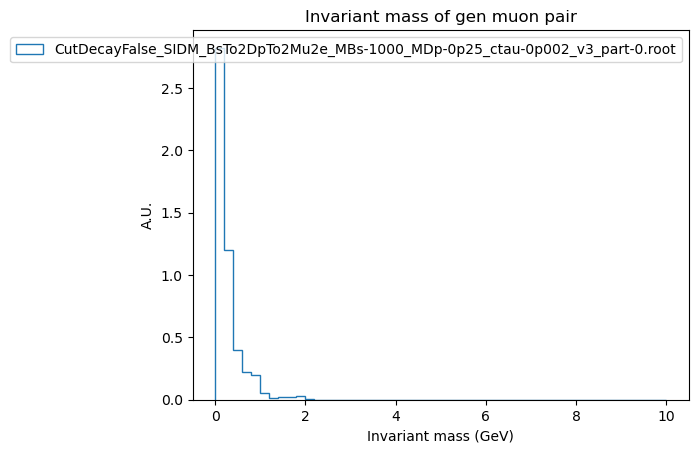

In [6]:
#Plot the invariant mass of the gen muon pair (should peak at the dark photon mass)

for file_name in file_names:
    print("Processing ",file_name)
    branches = branches_dict[file_name]
    
    #Create a vector object for the gen particles
    gen_p4 = vector.zip({"pt": branches['GenPart_pt'],
                          "eta": branches['GenPart_eta'],
                          "phi": branches['GenPart_phi'],
                          "mass": branches['GenPart_mass']}  )
    
    #Select gen muons 
    # (since we are using gen muons and the 2Mu2E files, we are guaranteed to have exactly 2 muons per event)
    gen_muon_mask = abs(branches["GenPart_pdgId"]) == 13
    gen_muon_p4 = gen_p4[gen_muon_mask]

    gen_muon_sum_p4 = gen_muon_p4[:, 0] + gen_muon_p4[:, 1]   

    plt.hist(gen_muon_sum_p4.mass, bins=50, range=(0, 10), label = file_name,histtype='step',density=True)
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('A.U.')
plt.title('Invariant mass of gen muon pair')
plt.legend(loc = 'upper right')